In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

In [2]:
#initializa os pesos aleatoriamente e zera o bias 
def weight_init(num_inputs): 
    w = 2*np.random.random((1,num_inputs)) - 1 # [1x3] 
    b = 0 
    return w,b

In [3]:
### Funções de ativação ####
def activation_func(func_type, z):
    if func_type == 'sigmoid':
        return 1/(1+np.exp(-z))
    elif func_type == 'tanh':
        return (2/(1+np.exp(-2*z)) -1)
    elif func_type == 'relu':
        return z * (z > 0)
    elif func_type == 'degrau':
        return z>=0

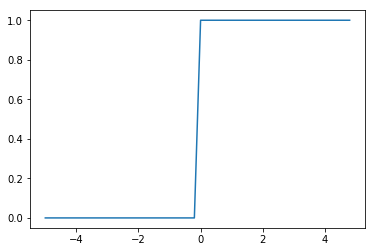

In [4]:
# Visualização e teste das funções de ativação
z = np.arange(-5., 5., 0.2)
sigmoid = []
for i in range(len(z)):
    sigmoid.append(activation_func('degrau', z[i]))

plt.plot(z,sigmoid)
plt.show()

In [26]:
# Etapa feedforward
w,b = weight_init(2)
def propagate(w,b,X,Y):
    z = np.dot(w,X)
    out = activation_func('degrau', z)
    return out

In [27]:
# Faz a predição da saída
def predict(z):
    return (z>0.5)

In [28]:
## AND Gate
#x = np.array([[0,0],[1,1],[1,0],[0,1]]).T 
#y = np.array([0,1,0,0])

## AND Gate com 3 entradas
x = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],
            [1,0,0],[1,0,1],[1,1,0],[1,1,1]]).T 
y = np.array([0,0,0,0,0,0,0,1])

## OR Gate
#x = np.array([[0,0],[1,1],[1,0],[0,1]]).T 
#y = np.array([0,1,1,1])

w,b = weight_init(3)
for j in range(1000):
    y_pred = propagate(w,b,x,y)
    erro = y - y_pred
    w += np.dot(erro*0.2, x.T)

print(y_pred)
print(predict(y_pred))
print(y)

[[ True False False False False False False False]]
[[ True False False False False False False False]]
[0 0 0 0 0 0 0 1]
